# Parametric Geometry Visualization

This notebook demonstrates the new parametric geometry generators for MaxwellScattererAndAntennaNGSolve.

**Features:**
- Ellipsoidal scatterers (tri-axial and spheroid)
- Cylindrical dipole antennas
- Mesh generation and visualization
- Physical property analysis

In [1]:
# Imports
from ngsolve import *
from ngsolve.webgui import Draw
import numpy as np
import matplotlib.pyplot as plt

from src import (
    create_ellipsoid_scatterer_geometry,
    create_spheroid_scatterer_geometry,
    create_dipole_antenna_geometry,
    create_dented_sphere_scatterer_geometry,
    create_spherical_geometry,
)

# Physical parameters
wavelength = 0.65  # meters (461 MHz)
k = 2 * pi / wavelength

print(f"Wavelength: {wavelength} m")
print(f"Wavenumber k: {k:.4f} rad/m")
print(f"Frequency: {3e8/wavelength/1e6:.1f} MHz")

Wavelength: 0.65 m
Wavenumber k: 9.6664 rad/m
Frequency: 461.5 MHz


## 1. Spherical Geometry (Baseline)

First, let's look at the original spherical geometry for comparison.

In [2]:
# Create spherical scatterer
mesh_sphere = create_spherical_geometry(
    R=1.0,
    PMLw=0.25,
    r=0.1,
    h_max=0.2
)

print(f"Spherical Mesh Statistics:")
print(f"  Elements: {mesh_sphere.ne}")
print(f"  Vertices: {mesh_sphere.nv}")
print(f"  Edges: {mesh_sphere.nedge}")
print(f"  Faces: {mesh_sphere.nface}")

# Visualize
Draw(mesh_sphere)

Spherical Mesh Statistics:
  Elements: 4078
  Vertices: 907
  Edges: 5392
  Faces: 8565


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

## 2. Ellipsoidal Scatterers

### 2.1 Prolate Spheroid (Cigar Shape)

Elongated along z-axis: $c > a = b$

In [3]:
# Prolate spheroid: elongated along z
mesh_prolate = create_spheroid_scatterer_geometry(
    wavelength=wavelength,
    equatorial_radius=0.05,  # a = b
    polar_radius=0.15,       # c > a (elongated)
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.2
)

print(f"Prolate Spheroid (Cigar Shape):")
print(f"  Equatorial radius (a=b): 0.05 m")
print(f"  Polar radius (c): 0.15 m")
print(f"  Aspect ratio (c/a): {0.15/0.05:.1f}")
print(f"  Elements: {mesh_prolate.ne}")
print(f"  Vertices: {mesh_prolate.nv}")

# Visualize
Draw(mesh_prolate)

Prolate Spheroid (Cigar Shape):
  Equatorial radius (a=b): 0.05 m
  Polar radius (c): 0.15 m
  Aspect ratio (c/a): 3.0
  Elements: 11885
  Vertices: 2292


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

### 2.2 Oblate Spheroid (Pancake Shape)

Flattened along z-axis: $c < a = b$

In [4]:
# Oblate spheroid: flattened along z
mesh_oblate = create_spheroid_scatterer_geometry(
    wavelength=wavelength,
    equatorial_radius=0.15,  # a = b
    polar_radius=0.05,       # c < a (flattened)
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.2
)

print(f"Oblate Spheroid (Pancake Shape):")
print(f"  Equatorial radius (a=b): 0.15 m")
print(f"  Polar radius (c): 0.05 m")
print(f"  Aspect ratio (c/a): {0.05/0.15:.2f}")
print(f"  Elements: {mesh_oblate.ne}")
print(f"  Vertices: {mesh_oblate.nv}")

# Visualize
Draw(mesh_oblate)

Oblate Spheroid (Pancake Shape):
  Equatorial radius (a=b): 0.15 m
  Polar radius (c): 0.05 m
  Aspect ratio (c/a): 0.33
  Elements: 21225
  Vertices: 4238


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

### 2.3 Tri-axial Ellipsoid

All three semi-axes different: $a \neq b \neq c$

In [5]:
# Tri-axial ellipsoid: all different
mesh_triaxial = create_ellipsoid_scatterer_geometry(
    wavelength=wavelength,
    semi_axis_a=0.05,
    semi_axis_b=0.10,
    semi_axis_c=0.15,
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.2,
    orientation='z'
)

print(f"Tri-axial Ellipsoid:")
print(f"  Semi-axis a: 0.05 m")
print(f"  Semi-axis b: 0.10 m")
print(f"  Semi-axis c: 0.15 m")
print(f"  Aspect ratios: b/a={0.10/0.05:.1f}, c/a={0.15/0.05:.1f}")
print(f"  Elements: {mesh_triaxial.ne}")
print(f"  Vertices: {mesh_triaxial.nv}")

# Visualize
Draw(mesh_triaxial)

Tri-axial Ellipsoid:
  Semi-axis a: 0.05 m
  Semi-axis b: 0.10 m
  Semi-axis c: 0.15 m
  Aspect ratios: b/a=2.0, c/a=3.0
  Elements: 15667
  Vertices: 2989


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

## 3. Cylindrical Dipole Antenna

### 3.1 Half-Wave Dipole (Resonant)

Length $L = \lambda/2$ gives fundamental resonance (~73 Ω impedance)

In [6]:
# Half-wave dipole
mesh_dipole_half = create_dipole_antenna_geometry(
    wavelength=wavelength,
    length_factor=0.5,   # L = λ/2
    radius_factor=0.01,  # r = λ/100
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.15
)

L = 0.5 * wavelength
r = 0.01 * wavelength

print(f"Half-Wave Dipole (Resonant):")
print(f"  Length: {L:.4f} m (λ/2)")
print(f"  Radius: {r:.4f} m (λ/100)")
print(f"  Aspect ratio L/r: {L/r:.1f}")
print(f"  Elements: {mesh_dipole_half.ne}")
print(f"  Vertices: {mesh_dipole_half.nv}")

# Visualize
Draw(mesh_dipole_half)

Half-Wave Dipole (Resonant):
  Length: 0.3250 m (λ/2)
  Radius: 0.0065 m (λ/100)
  Aspect ratio L/r: 50.0
  Elements: 43481
  Vertices: 8222


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

### 3.2 Short Dipole

Length $L = 0.3\lambda$ (shorter than resonance)

In [7]:
# Short dipole
mesh_dipole_short = create_dipole_antenna_geometry(
    wavelength=wavelength,
    length_factor=0.3,   # L = 0.3λ
    radius_factor=0.01,
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.15
)

L_short = 0.3 * wavelength
r_short = 0.01 * wavelength

print(f"Short Dipole:")
print(f"  Length: {L_short:.4f} m (0.3λ)")
print(f"  Radius: {r_short:.4f} m")
print(f"  Aspect ratio L/r: {L_short/r_short:.1f}")
print(f"  Elements: {mesh_dipole_short.ne}")

# Visualize
Draw(mesh_dipole_short)

Short Dipole:
  Length: 0.1950 m (0.3λ)
  Radius: 0.0065 m
  Aspect ratio L/r: 30.0
  Elements: 30286


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

### 3.3 Fat Dipole (Increased Bandwidth)

Thicker radius increases bandwidth but shifts resonance slightly

In [8]:
# Fat dipole (increased bandwidth)
mesh_dipole_fat = create_dipole_antenna_geometry(
    wavelength=wavelength,
    length_factor=0.5,
    radius_factor=0.02,  # r = λ/50 (twice as thick)
    domain_radius=1.0,
    pml_width=0.25,
    max_mesh_size=0.15
)

L_fat = 0.5 * wavelength
r_fat = 0.02 * wavelength

print(f"Fat Dipole:")
print(f"  Length: {L_fat:.4f} m (λ/2)")
print(f"  Radius: {r_fat:.4f} m (λ/50)")
print(f"  Aspect ratio L/r: {L_fat/r_fat:.1f}")
print(f"  Elements: {mesh_dipole_fat.ne}")

# Visualize
Draw(mesh_dipole_fat)

Fat Dipole:
  Length: 0.3250 m (λ/2)
  Radius: 0.0130 m (λ/50)
  Aspect ratio L/r: 25.0
  Elements: 26433


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

## 5. Different Orientations

Geometries can be oriented along different axes

In [10]:
# Ellipsoid along x-axis
mesh_ellipsoid_x = create_ellipsoid_scatterer_geometry(
    wavelength=wavelength,
    semi_axis_a=0.05,
    semi_axis_b=0.08,
    semi_axis_c=0.12,
    orientation='x',  # Major axis along x
    max_mesh_size=0.2
)

print(f"Ellipsoid along x-axis:")
print(f"  Elements: {mesh_ellipsoid_x.ne}")

Draw(mesh_ellipsoid_x)

Ellipsoid along x-axis:
  Elements: 12301


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

In [11]:
# Dipole along y-axis
mesh_dipole_y = create_dipole_antenna_geometry(
    wavelength=wavelength,
    length_factor=0.5,
    radius_factor=0.01,
    orientation='y',  # Along y-axis
    max_mesh_size=0.2
)

print(f"Dipole along y-axis:")
print(f"  Elements: {mesh_dipole_y.ne}")

Draw(mesh_dipole_y)

Dipole along y-axis:
  Elements: 40414


WebGuiWidget(layout=Layout(height='5vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.240…

BaseWebGuiScene

## 6. Mesh Refinement Study

Compare coarse, medium, and fine meshes

In [12]:
# Create meshes with different refinement levels
h_coarse = 0.3
h_medium = 0.15
h_fine = 0.1

mesh_coarse = create_ellipsoid_scatterer_geometry(
    wavelength=wavelength,
    semi_axis_a=0.05, semi_axis_b=0.05, semi_axis_c=0.15,
    max_mesh_size=h_coarse
)

mesh_medium = create_ellipsoid_scatterer_geometry(
    wavelength=wavelength,
    semi_axis_a=0.05, semi_axis_b=0.05, semi_axis_c=0.15,
    max_mesh_size=h_medium
)

mesh_fine = create_ellipsoid_scatterer_geometry(
    wavelength=wavelength,
    semi_axis_a=0.05, semi_axis_b=0.05, semi_axis_c=0.15,
    max_mesh_size=h_fine
)

print("Mesh Refinement Study:")
print(f"  Coarse (h={h_coarse}):  {mesh_coarse.ne:6d} elements, {mesh_coarse.nv:6d} vertices")
print(f"  Medium (h={h_medium}): {mesh_medium.ne:6d} elements, {mesh_medium.nv:6d} vertices")
print(f"  Fine (h={h_fine}):    {mesh_fine.ne:6d} elements, {mesh_fine.nv:6d} vertices")
print(f"\nRefinement factors:")
print(f"  Medium/Coarse: {mesh_medium.ne/mesh_coarse.ne:.2f}x")
print(f"  Fine/Medium: {mesh_fine.ne/mesh_medium.ne:.2f}x")
print(f"  Fine/Coarse: {mesh_fine.ne/mesh_coarse.ne:.2f}x")

Mesh Refinement Study:
  Coarse (h=0.3):   10614 elements,   1971 vertices
  Medium (h=0.15):  13992 elements,   2787 vertices
  Fine (h=0.1):     20777 elements,   4334 vertices

Refinement factors:
  Medium/Coarse: 1.32x
  Fine/Medium: 1.48x
  Fine/Coarse: 1.96x


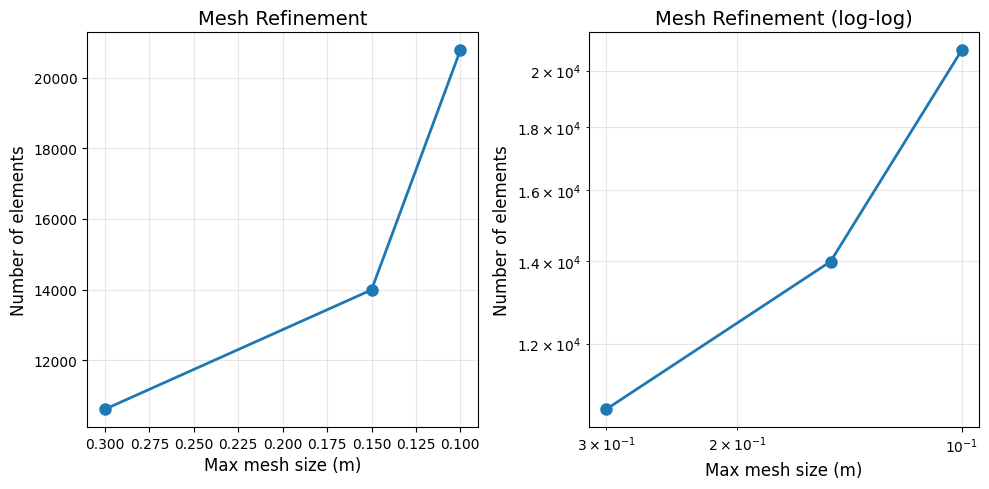

In [13]:
# Plot mesh refinement
mesh_sizes = [h_coarse, h_medium, h_fine]
element_counts = [mesh_coarse.ne, mesh_medium.ne, mesh_fine.ne]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mesh_sizes, element_counts, 'o-', linewidth=2, markersize=8)
plt.xlabel('Max mesh size (m)', fontsize=12)
plt.ylabel('Number of elements', fontsize=12)
plt.title('Mesh Refinement', fontsize=14)
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()

plt.subplot(1, 2, 2)
plt.loglog(mesh_sizes, element_counts, 'o-', linewidth=2, markersize=8)
plt.xlabel('Max mesh size (m)', fontsize=12)
plt.ylabel('Number of elements', fontsize=12)
plt.title('Mesh Refinement (log-log)', fontsize=14)
plt.grid(True, alpha=0.3, which='both')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

## 7. Comparison of All Geometries

Summary table of all geometry types

In [14]:
import pandas as pd

# Create comparison table
geometries = {
    'Geometry': [
        'Sphere (baseline)',
        'Prolate Spheroid',
        'Oblate Spheroid',
        'Tri-axial Ellipsoid',
        'Half-Wave Dipole',
        'Short Dipole',
        'Fat Dipole',
    ],
    'Elements': [
        mesh_sphere.ne,
        mesh_prolate.ne,
        mesh_oblate.ne,
        mesh_triaxial.ne,
        mesh_dipole_half.ne,
        mesh_dipole_short.ne,
        mesh_dipole_fat.ne,
    ],
    'Vertices': [
        mesh_sphere.nv,
        mesh_prolate.nv,
        mesh_oblate.nv,
        mesh_triaxial.nv,
        mesh_dipole_half.nv,
        mesh_dipole_short.nv,
        mesh_dipole_fat.nv,
    ],
    'Type': [
        'Scatterer',
        'Scatterer',
        'Scatterer',
        'Scatterer',
        'Antenna',
        'Antenna',
        'Antenna',
        'Scatterer',
    ]
}

df = pd.DataFrame(geometries)
print("\n" + "="*60)
print("Geometry Comparison (h_max ≈ 0.15-0.2 m)")
print("="*60)
print(df.to_string(index=False))
print("="*60)


Geometry Comparison (h_max ≈ 0.15-0.2 m)
           Geometry  Elements  Vertices      Type
  Sphere (baseline)      4078       907 Scatterer
   Prolate Spheroid     11885      2292 Scatterer
    Oblate Spheroid     21225      4238 Scatterer
Tri-axial Ellipsoid     15667      2989 Scatterer
   Half-Wave Dipole     43481      8222   Antenna
       Short Dipole     30286      5791   Antenna
         Fat Dipole     26433      5060   Antenna
      Dented Sphere      4966      1119 Scatterer


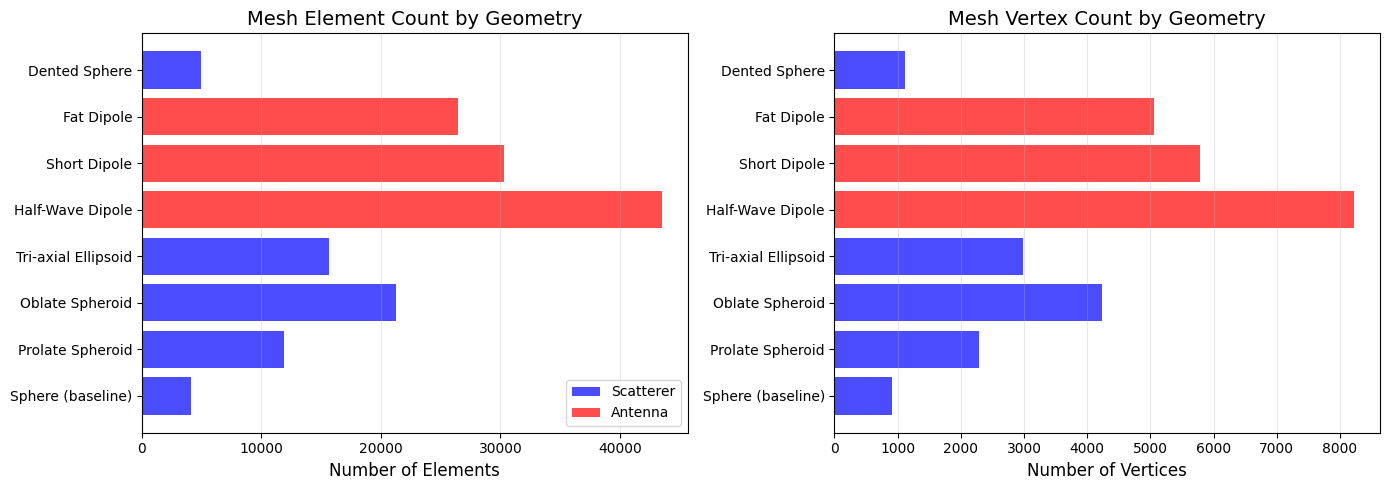

In [15]:
# Bar chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elements comparison
colors = ['blue' if t == 'Scatterer' else 'red' for t in df['Type']]
ax1.barh(df['Geometry'], df['Elements'], color=colors, alpha=0.7)
ax1.set_xlabel('Number of Elements', fontsize=12)
ax1.set_title('Mesh Element Count by Geometry', fontsize=14)
ax1.grid(True, alpha=0.3, axis='x')

# Vertices comparison
ax2.barh(df['Geometry'], df['Vertices'], color=colors, alpha=0.7)
ax2.set_xlabel('Number of Vertices', fontsize=12)
ax2.set_title('Mesh Vertex Count by Geometry', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', alpha=0.7, label='Scatterer'),
    Patch(facecolor='red', alpha=0.7, label='Antenna')
]
ax1.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## 8. Physical Properties

Analyze dimensions relative to wavelength

In [16]:
print(f"Physical Parameters (λ = {wavelength} m):")
print("\nScatterer Dimensions:")
print(f"  Sphere radius: 0.1 m = {0.1/wavelength:.3f}λ")
print(f"  Prolate (a=b): 0.05 m = {0.05/wavelength:.3f}λ, (c): 0.15 m = {0.15/wavelength:.3f}λ")
print(f"  Oblate (a=b): 0.15 m = {0.15/wavelength:.3f}λ, (c): 0.05 m = {0.05/wavelength:.3f}λ")

print("\nAntenna Dimensions:")
print(f"  Half-wave dipole: L={0.5*wavelength:.4f} m = 0.5λ, r={0.01*wavelength:.4f} m = 0.01λ")
print(f"  Short dipole: L={0.3*wavelength:.4f} m = 0.3λ")
print(f"  Fat dipole: r={0.02*wavelength:.4f} m = 0.02λ")

print("\nComputational Domain:")
print(f"  Outer radius: 1.0 m = {1.0/wavelength:.2f}λ")
print(f"  PML width: 0.25 m = {0.25/wavelength:.2f}λ")
print(f"  PML inner radius: 0.75 m = {0.75/wavelength:.2f}λ")

print("\nMesh Sizing:")
print(f"  Typical h_max: 0.15 m = {0.15/wavelength:.2f}λ ≈ λ/{wavelength/0.15:.0f}")
print(f"  Elements per wavelength: ~{wavelength/0.15:.0f}-{wavelength/0.1:.0f}")

Physical Parameters (λ = 0.65 m):

Scatterer Dimensions:
  Sphere radius: 0.1 m = 0.154λ
  Prolate (a=b): 0.05 m = 0.077λ, (c): 0.15 m = 0.231λ
  Oblate (a=b): 0.15 m = 0.231λ, (c): 0.05 m = 0.077λ

Antenna Dimensions:
  Half-wave dipole: L=0.3250 m = 0.5λ, r=0.0065 m = 0.01λ
  Short dipole: L=0.1950 m = 0.3λ
  Fat dipole: r=0.0130 m = 0.02λ

Computational Domain:
  Outer radius: 1.0 m = 1.54λ
  PML width: 0.25 m = 0.38λ
  PML inner radius: 0.75 m = 1.15λ

Mesh Sizing:
  Typical h_max: 0.15 m = 0.23λ ≈ λ/4
  Elements per wavelength: ~4-6


## 9. Aspect Ratio Study

Investigate how ellipsoid aspect ratio affects mesh density

In [17]:
# Create ellipsoids with varying aspect ratios
aspect_ratios = [0.5, 1.0, 2.0, 3.0, 5.0]
base_radius = 0.05
meshes_aspect = []

print("Aspect Ratio Study (a=b fixed, varying c):")
print(f"  Base equatorial radius: {base_radius} m")
print("\n  c/a    c (m)   Elements  Vertices")
print("  " + "-"*40)

for ratio in aspect_ratios:
    c = ratio * base_radius
    mesh = create_spheroid_scatterer_geometry(
        wavelength=wavelength,
        equatorial_radius=base_radius,
        polar_radius=c,
        max_mesh_size=0.15
    )
    meshes_aspect.append(mesh)
    print(f"  {ratio:3.1f}  {c:6.3f}  {mesh.ne:8d}  {mesh.nv:8d}")

Aspect Ratio Study (a=b fixed, varying c):
  Base equatorial radius: 0.05 m

  c/a    c (m)   Elements  Vertices
  ----------------------------------------
  0.5   0.025     15528      3126
  1.0   0.050      7234      1589
  2.0   0.100     10638      2200
  3.0   0.150     13992      2787
  5.0   0.250     18648      3647


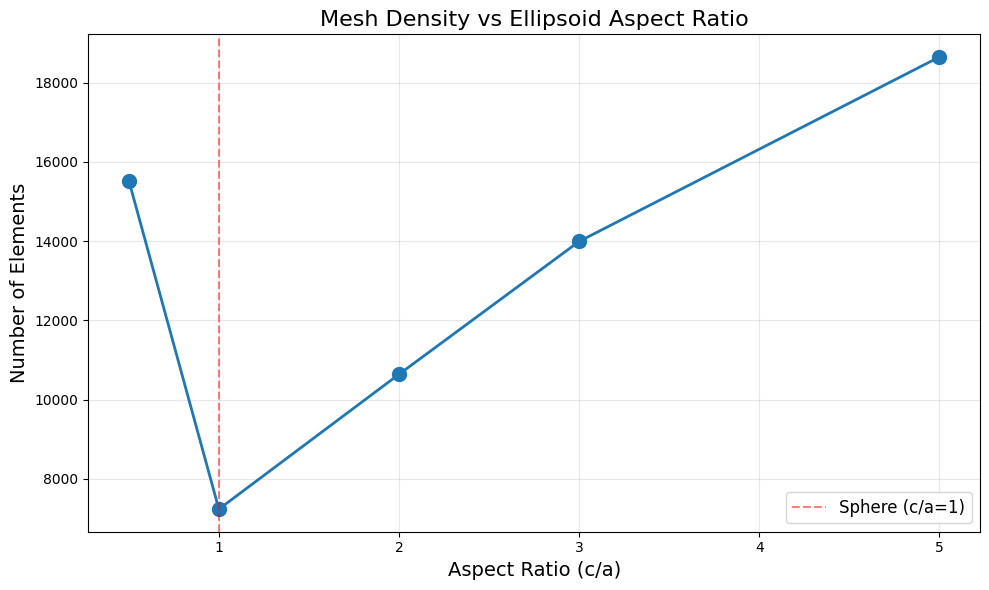

In [18]:
# Plot aspect ratio vs mesh size
element_counts_aspect = [m.ne for m in meshes_aspect]

plt.figure(figsize=(10, 6))
plt.plot(aspect_ratios, element_counts_aspect, 'o-', linewidth=2, markersize=10)
plt.xlabel('Aspect Ratio (c/a)', fontsize=14)
plt.ylabel('Number of Elements', fontsize=14)
plt.title('Mesh Density vs Ellipsoid Aspect Ratio', fontsize=16)
plt.grid(True, alpha=0.3)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, label='Sphere (c/a=1)')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()